FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    6/6/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


WC_ABS_GoM21Su_ID2122 - is fucked up 

!STOPED ON PW_ID2123!


In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/Mixing_experiment_2_st.16_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/Mixing_experiment_2_st.16_plot.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/Mixing_experiment_2_st.16_outputs.csv'
files

['../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_10ml_Absorbance__0__23-33-11-349.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_1ml_Absorbance__0__23-24-57-389.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_3ml_Absorbance__0__23-26-14-351.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_5ml_Absorbance__0__23-28-09-276.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_7ml_Absorbance__0__23-29-52-257.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_9ml_Absorbance__0__23-31-20-930.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_2_st.16\\221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_e

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM21SU thats not PW
#X = .4875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

X = .01

#X = .1


PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    #xi = np.arange(189,523,1)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [5]:
#EDIT HERE
n = 6 # how many underscore breaks 
stri = 3 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,221663_BBL_10ml_Absorbance__0__23-33-11-349.txt,221663_BBL_1ml_Absorbance__0__23-24-57-389.txt,221663_BBL_3ml_Absorbance__0__23-26-14-351.txt,221663_BBL_5ml_Absorbance__0__23-28-09-276.txt,221663_BBL_7ml_Absorbance__0__23-29-52-257.txt,221663_BBL_9ml_Absorbance__0__23-31-20-930.txt,221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt,221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt,221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt,221663_BBL_MIX_time_Absorbance__12__23-51-30-966.txt,...,221663_BBL_MIX_time_Absorbance__3__23-40-47-723.txt,221663_BBL_MIX_time_Absorbance__4__23-42-23-297.txt,221663_BBL_MIX_time_Absorbance__5__23-42-55-157.txt,221663_BBL_MIX_time_Absorbance__6__23-43-46-637.txt,221663_BBL_MIX_time_Absorbance__7__23-45-07-610.txt,221663_BBL_MIX_time_Absorbance__8__23-46-35-729.txt,221663_BBL_MIX_time_Absorbance__9__23-47-19-814.txt,221663_innital_Absorbance__0__23-21-56-906.txt,221663_innital_Absorbance__1__23-22-05-933.txt,BBL_innital_Absorbance__0__23-20-32-509.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,0.000000,0.000000,0.000000,4.721150,0.000000,0.000000,0.000000,-50.573880,0.000000,188.869030,...,0.000000,81.940740,-5.135690,-10.593800,0.000000,92.972110,0.000000,0.000000,0.000000,0.000000
190,0.000000,0.000000,0.000000,4.721150,0.000000,0.000000,0.000000,-50.573880,0.000000,188.869030,...,0.000000,81.940740,-5.135690,-10.593800,0.000000,92.972110,0.000000,0.000000,0.000000,0.000000
191,0.000000,31.704574,155.049240,0.000000,56.451313,0.000000,54.102748,214.461357,185.186616,61.868163,...,-2.687207,99.288259,24.865562,-1.034033,5.709865,-7.304632,2.503244,97.719644,32.896027,67.314485
192,-9.213929,0.696386,-23.789678,0.000000,0.000000,0.000000,176.415422,-9.270014,-6.270993,91.526793,...,-18.645890,105.465825,56.196388,0.000000,-7.475601,0.000000,91.857597,-12.832052,142.450717,0.000000
193,-58.106321,-38.470581,0.931911,-18.885461,0.000000,22.979616,20.278246,8.469172,-29.420969,118.086546,...,69.715230,41.311102,-3.577712,3.979661,7.275373,67.938461,-31.704615,-4.652099,38.982194,46.219596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-6.263800,3.960637,3.303142,0.405353,-0.028368,-4.516282,-4.621045,-2.094440,-2.862268,-8.428895,...,-5.069469,-5.173308,-5.724652,-7.091693,-4.641681,-5.357256,-4.348051,3.966964,2.284096,14.365720
877,-6.791836,2.549425,-0.930567,-2.068285,-7.343264,-6.711667,-8.430541,-5.483168,-9.181702,-9.558558,...,-8.171655,-8.581512,-7.586925,-6.047490,-7.116455,-10.033896,-9.076313,-0.347549,-1.766684,9.919340
878,-9.704996,2.243832,-4.419832,0.407990,1.324434,-3.901134,-10.342587,-4.366357,-7.487795,-6.142544,...,-4.115978,-4.595805,-8.896990,-2.524585,-5.930197,-3.313262,-9.962158,-0.379339,0.177466,17.462226


In [6]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
#d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code
#names = d.columns.str.rsplit('_', n=5).str[3]
#names = d.columns.str.rsplit('ID', n=2).str[1]
#names = names.str.rsplit('_', n=4).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
#df = d.groupby(names, axis=1).mean()
df

,221663_BBL_10ml_Absorbance__0__23-33-11-349.txt,221663_BBL_1ml_Absorbance__0__23-24-57-389.txt,221663_BBL_3ml_Absorbance__0__23-26-14-351.txt,221663_BBL_5ml_Absorbance__0__23-28-09-276.txt,221663_BBL_7ml_Absorbance__0__23-29-52-257.txt,221663_BBL_9ml_Absorbance__0__23-31-20-930.txt,221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt,221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt,221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt,221663_BBL_MIX_time_Absorbance__12__23-51-30-966.txt,...,221663_BBL_MIX_time_Absorbance__3__23-40-47-723.txt,221663_BBL_MIX_time_Absorbance__4__23-42-23-297.txt,221663_BBL_MIX_time_Absorbance__5__23-42-55-157.txt,221663_BBL_MIX_time_Absorbance__6__23-43-46-637.txt,221663_BBL_MIX_time_Absorbance__7__23-45-07-610.txt,221663_BBL_MIX_time_Absorbance__8__23-46-35-729.txt,221663_BBL_MIX_time_Absorbance__9__23-47-19-814.txt,221663_innital_Absorbance__0__23-21-56-906.txt,221663_innital_Absorbance__1__23-22-05-933.txt,BBL_innital_Absorbance__0__23-20-32-509.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,0.000000,0.000000,0.000000,4.721150,0.000000,0.000000,0.000000,-50.573880,0.000000,188.869030,...,0.000000,81.940740,-5.135690,-10.593800,0.000000,92.972110,0.000000,0.000000,0.000000,0.000000
190,0.000000,0.000000,0.000000,4.721150,0.000000,0.000000,0.000000,-50.573880,0.000000,188.869030,...,0.000000,81.940740,-5.135690,-10.593800,0.000000,92.972110,0.000000,0.000000,0.000000,0.000000
191,0.000000,31.704574,155.049240,0.000000,56.451313,0.000000,54.102748,214.461357,185.186616,61.868163,...,-2.687207,99.288259,24.865562,-1.034033,5.709865,-7.304632,2.503244,97.719644,32.896027,67.314485
192,-9.213929,0.696386,-23.789678,0.000000,0.000000,0.000000,176.415422,-9.270014,-6.270993,91.526793,...,-18.645890,105.465825,56.196388,0.000000,-7.475601,0.000000,91.857597,-12.832052,142.450717,0.000000
193,-58.106321,-38.470581,0.931911,-18.885461,0.000000,22.979616,20.278246,8.469172,-29.420969,118.086546,...,69.715230,41.311102,-3.577712,3.979661,7.275373,67.938461,-31.704615,-4.652099,38.982194,46.219596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-6.263800,3.960637,3.303142,0.405353,-0.028368,-4.516282,-4.621045,-2.094440,-2.862268,-8.428895,...,-5.069469,-5.173308,-5.724652,-7.091693,-4.641681,-5.357256,-4.348051,3.966964,2.284096,14.365720
877,-6.791836,2.549425,-0.930567,-2.068285,-7.343264,-6.711667,-8.430541,-5.483168,-9.181702,-9.558558,...,-8.171655,-8.581512,-7.586925,-6.047490,-7.116455,-10.033896,-9.076313,-0.347549,-1.766684,9.919340
878,-9.704996,2.243832,-4.419832,0.407990,1.324434,-3.901134,-10.342587,-4.366357,-7.487795,-6.142544,...,-4.115978,-4.595805,-8.896990,-2.524585,-5.930197,-3.313262,-9.962158,-0.379339,0.177466,17.462226


In [7]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
#bcorr = df[333:334].mean(axis=0) # 333:334 is 521 to 522 nm and this line takes the average 
#df = df[:] - df[333:334].mean(axis=0) # here we correct the data by that average 

bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

df

,221663_BBL_10ml_Absorbance__0__23-33-11-349.txt,221663_BBL_1ml_Absorbance__0__23-24-57-389.txt,221663_BBL_3ml_Absorbance__0__23-26-14-351.txt,221663_BBL_5ml_Absorbance__0__23-28-09-276.txt,221663_BBL_7ml_Absorbance__0__23-29-52-257.txt,221663_BBL_9ml_Absorbance__0__23-31-20-930.txt,221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt,221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt,221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt,221663_BBL_MIX_time_Absorbance__12__23-51-30-966.txt,...,221663_BBL_MIX_time_Absorbance__3__23-40-47-723.txt,221663_BBL_MIX_time_Absorbance__4__23-42-23-297.txt,221663_BBL_MIX_time_Absorbance__5__23-42-55-157.txt,221663_BBL_MIX_time_Absorbance__6__23-43-46-637.txt,221663_BBL_MIX_time_Absorbance__7__23-45-07-610.txt,221663_BBL_MIX_time_Absorbance__8__23-46-35-729.txt,221663_BBL_MIX_time_Absorbance__9__23-47-19-814.txt,221663_innital_Absorbance__0__23-21-56-906.txt,221663_innital_Absorbance__1__23-22-05-933.txt,BBL_innital_Absorbance__0__23-20-32-509.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,3.304894,2.191198,1.938002,6.359400,2.263683,3.193420,2.479920,-49.479429,1.670575,191.292788,...,2.287287,84.177834,-3.064523,-8.987460,2.595485,95.673146,2.656271,2.127825,3.656226,-9.708290
190,3.304894,2.191198,1.938002,6.359400,2.263683,3.193420,2.479920,-49.479429,1.670575,191.292788,...,2.287287,84.177834,-3.064523,-8.987460,2.595485,95.673146,2.656271,2.127825,3.656226,-9.708290
191,3.304894,33.895772,156.987242,1.638250,58.714996,3.193420,56.582669,215.555809,186.857191,64.291921,...,-0.399919,101.525353,26.936729,0.572307,8.305350,-4.603596,5.159515,99.847469,36.552253,57.606195
192,-5.909034,2.887584,-21.851675,1.638250,2.263683,3.193420,178.895342,-8.175562,-4.600418,93.950551,...,-16.358602,107.702918,58.267555,1.606340,-4.880116,2.701036,94.513868,-10.704226,146.106944,-9.708290
193,-54.801426,-36.279383,2.869913,-17.247211,2.263683,26.173036,22.758166,9.563623,-27.750394,120.510304,...,72.002518,43.548195,-1.506545,5.586002,9.870857,70.639496,-29.048344,-2.524273,42.638421,36.511306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-2.958905,6.151835,5.241144,2.043603,2.235315,-1.322862,-2.141124,-0.999989,-1.191693,-6.005138,...,-2.782181,-2.936215,-3.653485,-5.485353,-2.046197,-2.656221,-1.691779,6.094789,5.940323,4.657430
877,-3.486941,4.740623,1.007436,-0.430036,-5.079580,-3.518247,-5.950621,-4.388717,-7.511127,-7.134800,...,-5.884368,-6.344418,-5.515758,-4.441150,-4.520970,-7.332861,-6.420042,1.780277,1.889543,0.211051
878,-6.400101,4.435030,-2.481830,2.046240,3.588118,-0.707714,-7.862667,-3.271906,-5.817219,-3.718786,...,-1.828691,-2.358711,-6.825823,-0.918245,-3.334713,-0.612226,-7.305887,1.748487,3.833693,7.753936


In [8]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

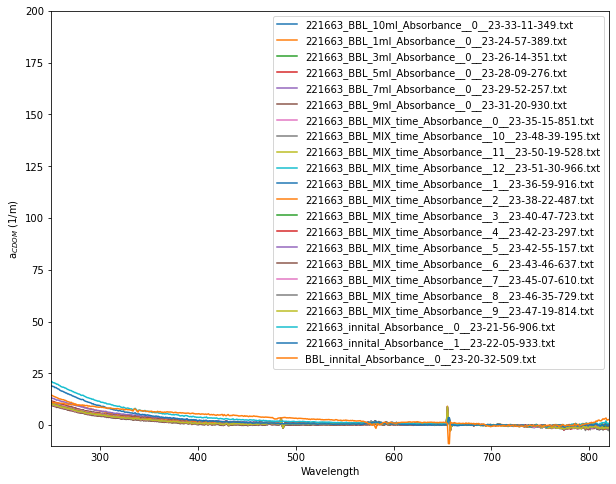

In [9]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-10,200)
ax.set_xlim(250,820)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 

df['wl'] = df.index
df

,221663_BBL_10ml_Absorbance__0__23-33-11-349.txt,221663_BBL_1ml_Absorbance__0__23-24-57-389.txt,221663_BBL_3ml_Absorbance__0__23-26-14-351.txt,221663_BBL_5ml_Absorbance__0__23-28-09-276.txt,221663_BBL_7ml_Absorbance__0__23-29-52-257.txt,221663_BBL_9ml_Absorbance__0__23-31-20-930.txt,221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt,221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt,221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt,221663_BBL_MIX_time_Absorbance__12__23-51-30-966.txt,...,221663_BBL_MIX_time_Absorbance__4__23-42-23-297.txt,221663_BBL_MIX_time_Absorbance__5__23-42-55-157.txt,221663_BBL_MIX_time_Absorbance__6__23-43-46-637.txt,221663_BBL_MIX_time_Absorbance__7__23-45-07-610.txt,221663_BBL_MIX_time_Absorbance__8__23-46-35-729.txt,221663_BBL_MIX_time_Absorbance__9__23-47-19-814.txt,221663_innital_Absorbance__0__23-21-56-906.txt,221663_innital_Absorbance__1__23-22-05-933.txt,BBL_innital_Absorbance__0__23-20-32-509.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189.2794,-0.00000,-0.00000,-0.00000,4.72115,-0.00000,-0.00000,-0.00000,-50.57388,-0.00000,188.86903,...,81.94074,-5.13569,-10.59380,-0.00000,92.97211,-0.00000,-0.00000,-0.00000,-0.00000,189.2794
189.6618,-0.00000,-0.00000,-0.00000,4.72115,-0.00000,-0.00000,-0.00000,-50.57388,-0.00000,188.86903,...,81.94074,-5.13569,-10.59380,-0.00000,92.97211,-0.00000,-0.00000,-0.00000,-0.00000,189.6618
190.0441,-0.00000,-0.00000,-0.00000,4.72115,-0.00000,-0.00000,-0.00000,-50.57388,-0.00000,188.86903,...,81.94074,-5.13569,-10.59380,-0.00000,92.97211,-0.00000,-0.00000,-0.00000,-0.00000,190.0441
190.4264,-0.00000,-285.82533,-313.13891,-265.81226,-237.41627,-283.68354,-116.66998,-0.00000,-0.00000,-0.00000,...,-0.00000,-0.00000,-211.20813,-0.00000,-0.00000,-135.99215,-0.00000,-0.00000,-120.42387,190.4264
190.8087,-0.00000,-0.00000,162.54574,-0.00000,-0.00000,-0.00000,116.85422,262.40382,-0.00000,27.22146,...,-0.00000,25.88572,-0.00000,30.69899,-41.40794,-0.00000,102.87501,53.54475,134.84065,190.8087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,-4.69812,5.68841,-3.54662,3.08602,3.27026,-7.11627,-1.95755,-1.91149,-7.62293,-5.29690,...,-8.29080,-8.40595,-5.66538,-8.63625,-7.25445,-7.96838,-2.27997,-3.56965,16.48948,880.5978
880.8884,-3.08602,1.93452,3.40844,5.57326,-2.18785,-0.06909,-1.68119,-2.71754,-3.15511,-9.00473,...,-7.48475,-9.97199,-3.36238,-2.18785,-7.53081,-5.96477,-2.16482,-2.53330,9.53442,880.8884
881.1790,-7.78414,0.48363,-1.86543,-0.46060,-2.60239,-4.44479,-5.20478,-5.31993,-7.71505,-9.14291,...,-2.92481,-8.61322,-8.65928,-6.03386,-2.85572,-5.71144,2.92481,-1.33574,14.18648,881.1790


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 275_295 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 1000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (1, 10, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 275_295 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs 
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
221663_BBL_10ml_Absorbance__0__23-33-11-349.txt,NaN,0.015517,NaN,NaN,3.414404,NaN,6.646140,3.910322,1.346709,-1.344278,-1.711002,7.503623,4.040892,1.264299,-1.297255,-1.644291,3.124013,3.943491,1.308879
221663_BBL_1ml_Absorbance__0__23-24-57-389.txt,0.014955,0.016196,NaN,4.699406,3.595948,NaN,11.795970,7.036109,2.915494,-0.845554,-1.280497,13.367729,7.237274,2.777703,-0.772929,-1.187054,1.878631,1.618523,1.023296
221663_BBL_3ml_Absorbance__0__23-26-14-351.txt,0.014341,0.009672,NaN,4.487372,1.738371,NaN,7.816977,4.649408,1.851085,-0.795518,-1.114844,8.851596,4.788507,1.758657,-0.745373,-1.048886,4.056255,73.961067,0.617865
221663_BBL_5ml_Absorbance__0__23-28-09-276.txt,0.015301,0.022591,NaN,4.796188,5.404316,NaN,9.646594,5.757143,2.428241,-0.550165,-0.886435,10.899635,5.909918,2.320977,-0.488366,-0.810303,3.113421,3.144047,1.240496
221663_BBL_7ml_Absorbance__0__23-29-52-257.txt,0.011795,0.009138,NaN,3.643539,1.575448,NaN,9.743473,6.470527,3.324790,-0.130177,-0.626003,10.827676,6.652602,3.215649,-0.084821,-0.550107,3.914599,90.998632,1.436634
221663_BBL_9ml_Absorbance__0__23-31-20-930.txt,NaN,0.017139,NaN,NaN,3.877408,NaN,7.330668,4.262667,1.456087,-1.366831,-1.732989,8.281495,4.396850,1.367220,-1.312321,-1.660305,5.856217,29.340578,0.959908
221663_BBL_MIX_time_Absorbance__0__23-35-15-851.txt,NaN,0.011387,NaN,NaN,2.216412,NaN,8.286444,4.672087,1.585261,-1.166232,-1.475482,9.376467,4.793236,1.490236,-1.102852,-1.400913,1.320517,0.991014,1.413046
221663_BBL_MIX_time_Absorbance__10__23-48-39-195.txt,NaN,0.017909,NaN,NaN,4.098741,NaN,8.882169,4.971440,1.900177,-0.467615,-0.690102,10.076802,5.078041,1.809762,-0.409239,-0.627924,1.738372,1.440275,1.120104
221663_BBL_MIX_time_Absorbance__11__23-50-19-528.txt,NaN,0.015832,NaN,NaN,3.501354,NaN,8.531897,4.747385,1.681927,-0.810543,-1.060862,9.681071,4.856813,1.588682,-0.750348,-0.994267,13.274198,459.281578,0.964067
